# keras Regressor

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

Using TensorFlow backend.


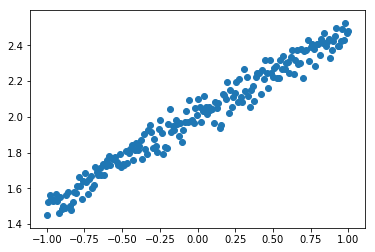

In [2]:
np.random.seed(1337)  # for reproducibility

# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

In [3]:
X_train, Y_train = X[:160], Y[:160]     # train 前 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 后 40 data points

### build a neural network from the 1st layer to the last layer

In [4]:
model = Sequential()
model.add(Dense(units=1, input_dim=1))

### choose loss function and optimizing method

In [5]:
model.compile(loss='mse', optimizer='sgd')

### training

In [6]:
print('Training ......')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step%100 ==0:
        print(step, '\t', cost)

Training ......
0 	 4.0225
100 	 0.0732386
200 	 0.00386273
300 	 0.00264345


### test

In [14]:
print('Testing......')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:\t', cost)

W, b = model.layers[0].get_weights()
print()
print('weights=%f;\tbias=%f'%(W, b))

Testing......
40/40 [==============================] - 0s
test cost:	 0.00815232843161

weights=0.607714;	bias=2.001935


###  plotting the prediction

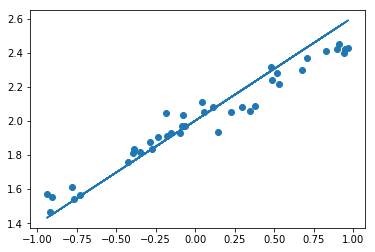

In [15]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()